In [16]:
#> Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [17]:
#> Loading Mnist dataset
(train_images,train_labels), (test_images,test_labels) =  mnist.load_data()
print(train_images.shape, "  |  ", test_images.shape)
print(train_images.ndim)
print(train_images.dtype)

(60000, 28, 28)   |   (10000, 28, 28)
3
uint8


In [18]:
#> in convolutional networks we keep the images in their base shape
#    (28x28, not 784) and then we set our channels depth
X_train = train_images.reshape(60000,28,28,1)
X_test  = test_images.reshape (10000,28,28,1)
X_train = X_train.astype("float32")
X_test  = X_test.astype ("float32")
X_train /= 255
X_test  /= 255
    # we do this only for our images (because we don't need to change our labels we don't do this to them)

In [19]:
#> Make labels vector to categorical
    # example: if a label is labeled as 5, it will be a list that all indexes (0:12) will be zero except index 5 which will be 1
from keras.utils import np_utils
Y_train = np_utils.to_categorical(train_labels)
Y_test  = np_utils.to_categorical(test_labels )

In [20]:
#> Creating Model
from keras.models import Model
from keras.layers import Conv2D,MaxPooling2D,Input,Flatten,Dense

# in each layer we will call with the previous layer as arg
myInputLayer = Input(shape=(28,28,1))
myConv1 = Conv2D(16      ,  (3,3)     ,  activation='relu' , padding='same')(myInputLayer)
       #       filter nom, window size                        same : output has the same size as input
       #                                                      valid: a little bit smaller
myPool1 = MaxPooling2D(pool_size=(2,2))(myConv1)
       # both filter_nom and pool_size can be 3/2 which simply means (3,3)/(2,2)
myConv2 = Conv2D(32      ,  3     ,  activation='relu' , padding='same')(myPool1)
myPool2 = MaxPooling2D(pool_size=(2,2))(myConv2)
       # we can use strides=2 as Conv2D parameter so we don't need to add MaxPool2D layers
       # result will be the same but with faster speed
# now we will change it to a vector
flat = Flatten()(myPool2)
out_layer = Dense(10, activation='softmax')(flat)

# finally we will create our model
myModel = Model(myInputLayer,out_layer)


myModel.summary()
       #] if we want to change layers name:
              # myModel.layers[0].name = "Layer123"
       #] if we want to stop a layer to be trainable:
              # myModel.layers[0].trainable = False
       #] to get config of a layer:
              # moModel.layers[0].get_config()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1568)              0   

In [21]:
#> Compiling Model
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
myModel.compile(optimizer=Adam(learning_rate=0.001), loss=categorical_crossentropy, metrics=["accuracy"])
                        

In [22]:
#> Learn
network_history = myModel.fit(X_train,Y_train,batch_size=128,epochs=5,validation_split=0.2)#,verbose=0)
                                #] Vaildation_Split: we give % of devision in each train and test,
                                    # it will automaticly take it as validation and returns it
                                    # this will takes 20% as validation and learn with 80%
history = network_history.history # .history gives a dict

Epoch 1/7
375/375 [==============================] - 11s 27ms/step - loss: 0.3903 - accuracy: 0.8915 - val_loss: 0.1309 - val_accuracy: 0.9617
Epoch 2/7
375/375 [==============================] - 9s 25ms/step - loss: 0.1007 - accuracy: 0.9693 - val_loss: 0.0824 - val_accuracy: 0.9761
Epoch 3/7
375/375 [==============================] - 9s 25ms/step - loss: 0.0728 - accuracy: 0.9776 - val_loss: 0.0699 - val_accuracy: 0.9788
Epoch 4/7
375/375 [==============================] - 10s 26ms/step - loss: 0.0595 - accuracy: 0.9814 - val_loss: 0.0590 - val_accuracy: 0.9831
Epoch 5/7
375/375 [==============================] - 10s 26ms/step - loss: 0.0506 - accuracy: 0.9844 - val_loss: 0.0574 - val_accuracy: 0.9839
Epoch 6/7
375/375 [==============================] - 10s 27ms/step - loss: 0.0442 - accuracy: 0.9866 - val_loss: 0.0531 - val_accuracy: 0.9838
Epoch 7/7
375/375 [==============================] - 10s 27ms/step - loss: 0.0410 - accuracy: 0.9870 - val_loss: 0.0495 - val_accuracy: 0.9843


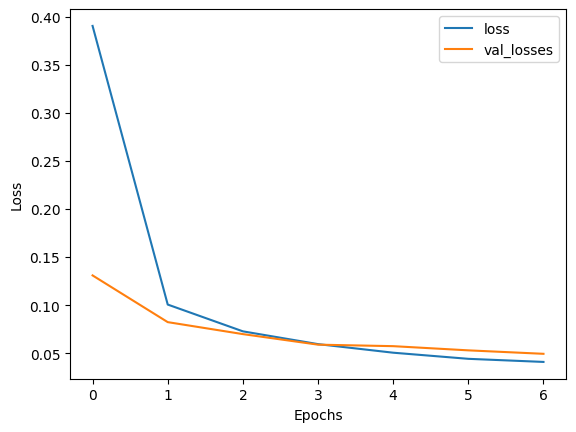

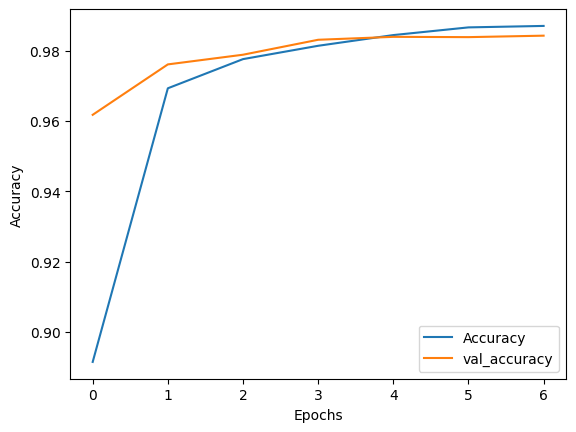

In [23]:
losses = history["loss"]
accuracies = history["accuracy"]
val_losses = history['val_loss']
val_accurecies = history['val_accuracy']
plt.plot(losses)
plt.plot(val_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','val_losses'])
    # when these 2 plots are going same way, it's ok but when train goes down
        # but validation wen up, it is porbabely overfitted  
        # we have to add a drop-out layer 
            # Dropout will reduce parameters and prevents over-fitting (not completely)

plt.figure()

plt.plot(accuracies)
plt.plot(val_accurecies)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy','val_accuracy'])


In [24]:
#> Evaluation
test_loss, test_accuracy = myModel.evaluate(X_test,Y_test)
test_labels_predicted = myModel.predict(X_test)
    # when you check the variable you will see the next line gets the max for each row
test_labels_predicted = np.argmax(test_labels_predicted,axis=1)

313/313 [==============================] - 1s 3ms/step
